# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [26]:
pip install citipy

Note: you may need to restart the kernel to use updated packages.


In [9]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

### Generate the Cities List by Using the `citipy` Library

In [11]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 594


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [13]:
# Set the API base URL
url = f"http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID={weather_api_key}"
# Print (url)

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval")
print("-" * 15)

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "&q=" + city

    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city,
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass

    # pause to avoid rate limiting
    time.sleep(1)

# Indicate that Data Loading is complete
print("-" * 15)
print("Data Retrieval Complete")
print("-" * 15)

Beginning Data Retrieval
---------------
Processing Record 1 of Set 1 | cukurca
Processing Record 2 of Set 1 | adamstown
Processing Record 3 of Set 1 | edinburgh of the seven seas
Processing Record 4 of Set 1 | ushuaia
Processing Record 5 of Set 1 | aasiaat
Processing Record 6 of Set 1 | tromso
Processing Record 7 of Set 1 | la trinite
Processing Record 8 of Set 1 | nicoya
Processing Record 9 of Set 1 | waitangi
Processing Record 10 of Set 1 | lewiston orchards
Processing Record 11 of Set 1 | taiohae
City not found. Skipping...
Processing Record 12 of Set 1 | tura
Processing Record 13 of Set 1 | taksimo
Processing Record 14 of Set 1 | adrasmon
Processing Record 15 of Set 1 | albany
Processing Record 16 of Set 1 | port-aux-francais
Processing Record 17 of Set 1 | remire-montjoly
Processing Record 18 of Set 1 | anadyr
Processing Record 19 of Set 1 | lompoc
Processing Record 20 of Set 1 | biala podlaska
Processing Record 21 of Set 1 | invercargill
Processing Record 22 of Set 1 | hauterive

In [15]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          572
Lat           572
Lng           572
Max Temp      572
Humidity      572
Cloudiness    572
Wind Speed    572
Country       572
Date          572
dtype: int64

In [17]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,cukurca,37.2481,43.6136,61.68,53,90,3.13,TR,1729014604
1,adamstown,-25.0660,-130.1015,70.16,85,75,15.66,PN,1729014605
2,edinburgh of the seven seas,-37.0676,-12.3116,54.05,64,8,14.67,SH,1729014606
3,ushuaia,-54.8000,-68.3000,58.66,25,0,23.02,AR,1729014455
4,aasiaat,68.7098,-52.8699,26.76,91,93,8.37,GL,1729014608


In [19]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [21]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Extract relevant fields from the data frame
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,cukurca,37.2481,43.6136,61.68,53,90,3.13,TR,1729014604
1,adamstown,-25.0660,-130.1015,70.16,85,75,15.66,PN,1729014605
2,edinburgh of the seven seas,-37.0676,-12.3116,54.05,64,8,14.67,SH,1729014606
3,ushuaia,-54.8000,-68.3000,58.66,25,0,23.02,AR,1729014455
4,aasiaat,68.7098,-52.8699,26.76,91,93,8.37,GL,1729014608


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

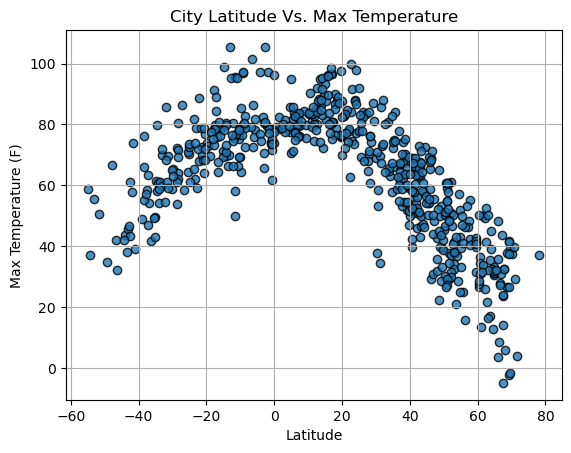

In [23]:
# Build scatter plot for Latitude vs. Temperature
plt.scatter(lats,
            max_temps,
           edgecolor="black", linewidth=1, marker="o",
           alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude Vs. Max Temperature")
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

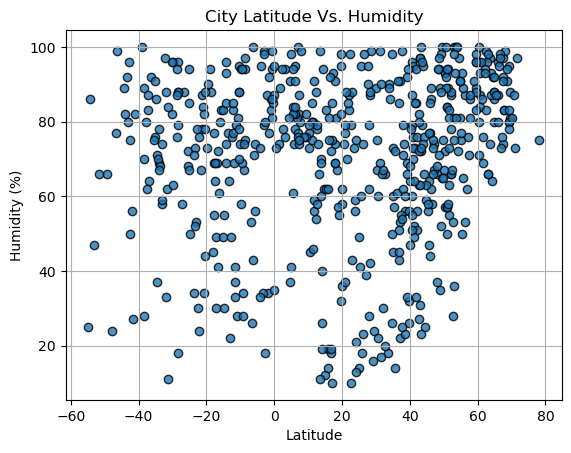

In [25]:
# Build the scatter plots for Latitude vs. Humidity
plt.scatter(lats,
            humidity,
           edgecolor="black", linewidth=1, marker="o",
           alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude Vs. Humidity")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

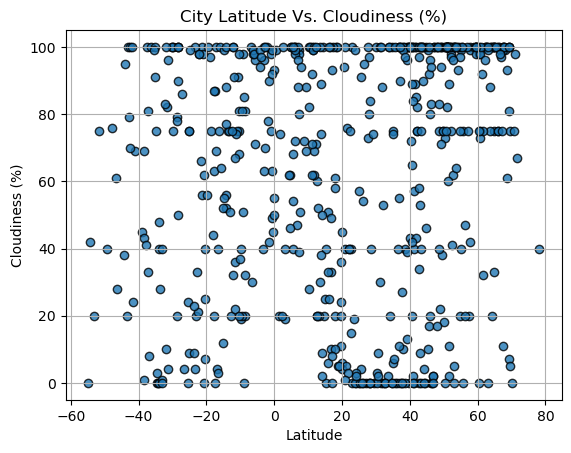

In [27]:
# Build the scatter plots for Latitude vs. Cloudiness
plt.scatter(lats,
            cloudiness,
           edgecolor="black", linewidth=1, marker="o",
           alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude Vs. Cloudiness (%)")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

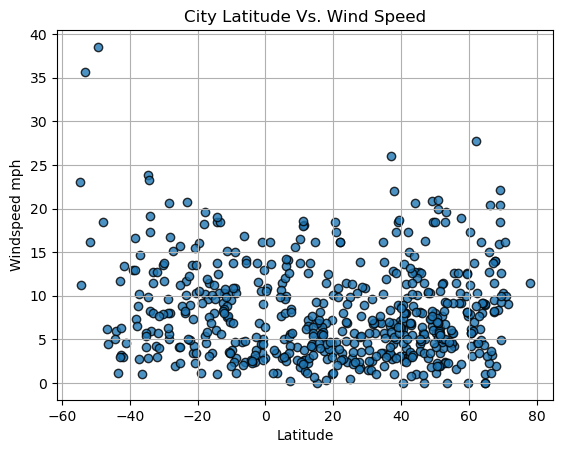

In [29]:
# Build the scatter plots for Latitude vs. Wind Speed
plt.scatter(lats,
            wind_speed,
           edgecolor="black", linewidth=1, marker="o",
           alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude Vs. Wind Speed")
plt.ylabel("Windspeed mph")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [61]:
# Define a function to create Linear Regression plots
def plot_linear_regression(x_values,y_values,title,text_coordinates):
    
    (slope, intercept, rvalue, pvalue, stderr) = linregress (x_values,y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + " x + " + str(round(intercept,2))

    # Plot
    plt.scatter(x_values, y_values, color="turquoise", edgecolor="black", linewidth=1, marker="o")
    plt.plot(x_values, regress_values, "r-")
    plt.annotate(line_eq,text_coordinates, fontsize=15, color="red")
    plt.xlabel("Latitude")
    plt.ylabel("Wind Speed (m/s)") # Adjusted each time for different comparisons
    plt.title("Wind Speed vs. Latitude") # Adjusted each time for different comparisons
    print(f"The r-squared is: {rvalue}")
    plt.show()

In [33]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,cukurca,37.2481,43.6136,61.68,53,90,3.13,TR,1729014604
4,aasiaat,68.7098,-52.8699,26.76,91,93,8.37,GL,1729014608
5,tromso,69.6496,18.9570,39.22,81,75,12.66,NO,1729014609
6,la trinite,14.7376,-60.9629,89.65,62,20,16.11,MQ,1729014611
7,nicoya,10.1483,-85.4520,83.59,73,100,1.81,CR,1729014612


In [35]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] <0)]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,adamstown,-25.0660,-130.1015,70.16,85,75,15.66,PN,1729014605
2,edinburgh of the seven seas,-37.0676,-12.3116,54.05,64,8,14.67,SH,1729014606
3,ushuaia,-54.8000,-68.3000,58.66,25,0,23.02,AR,1729014455
8,waitangi,-43.9535,-176.5597,43.83,82,95,5.99,NZ,1729014613
14,port-aux-francais,-49.3500,70.2167,34.75,66,40,38.54,TF,1729014620


###  Temperature vs. Latitude Linear Regression Plot

The r-squared is: -0.8612471016533517


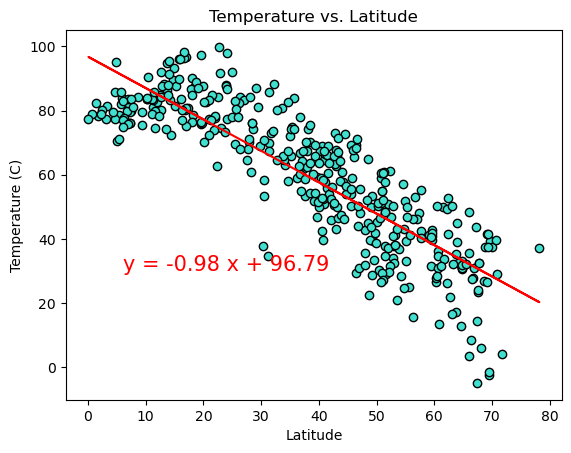

<Figure size 640x480 with 0 Axes>

In [37]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df ["Lat"]
y_values = northern_hemi_df ["Max Temp"]
plot_linear_regression(x_values, y_values, 'Max Temp', (6,30))

plt.savefig("output_data/Fig5.png")


The r-squared is: 0.6969918711524113


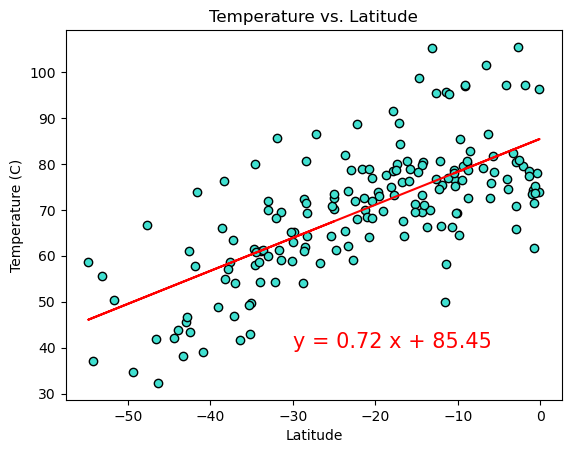

<Figure size 640x480 with 0 Axes>

In [39]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df ["Lat"]
y_values = southern_hemi_df ["Max Temp"]
plot_linear_regression(x_values,y_values, 'Max Temp', (-30,40))

plt.savefig("output_data/Fig6.png")

**Discussion about the linear relationship:** 
There is a negative correlation in this graph that compares the temperature to the latitude in the Northern Hemisphere. As the latitude increases the temperature decreases, which correlates with the North Pole of the Earth which is at 90 degrees latitdue. The poles are the colder points where the equater is the warmest point. There is a positive correlation in this graph that compares the temperature to the latitude in the Southern Hemisphere. As the lattitude gets closer to zero, which would be the equater, the temperatures increase. Both calculations have an r-squared value of over 80%, which means that the correlation best fits the data that is represented.

### Humidity vs. Latitude Linear Regression Plot

The r-squared is: 0.22483472974607652


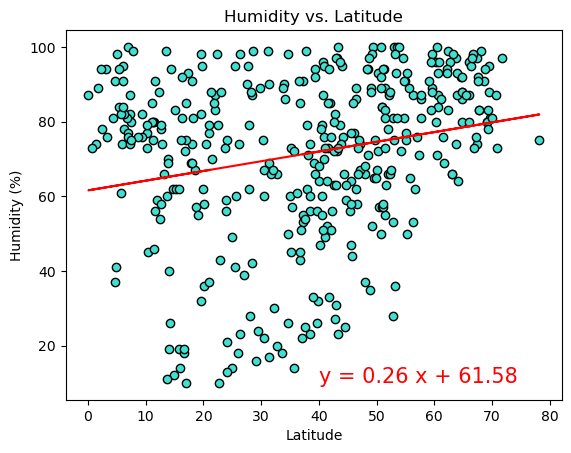

<Figure size 640x480 with 0 Axes>

In [43]:
# Northern Hemisphere
x_values = northern_hemi_df ["Lat"]
y_values = northern_hemi_df ["Humidity"]
plot_linear_regression(x_values,y_values, 'Humidity', (40,10))

plt.savefig("output_data/Fig7.png")

The r-squared is: 0.013572945829155962


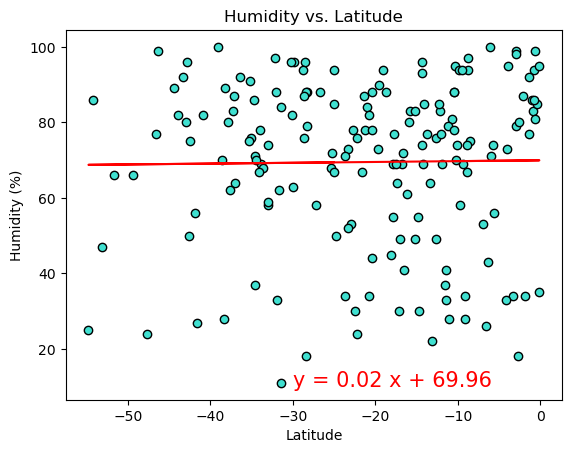

<Figure size 640x480 with 0 Axes>

In [49]:
# Southern Hemisphere
x_values = southern_hemi_df ["Lat"]
y_values = southern_hemi_df ["Humidity"]
plot_linear_regression(x_values,y_values, 'Humidity', (-30,10))

plt.savefig("output_data/Fig8.png")

**Discussion about the linear relationship:** There appears to be slight positive correlation in the Northern Hemisphere to humidity and lattitude. The r-squared value for the Southern Hemisphere is positive, but still is extremely low which would mean that there is little to no correlation between the two variables. The values for the Southern Hemisphere are all over the graph and there doesn't seem to be a pattern of behavior in regards to humidity and lattitude. Overall, I don't think many conclusions can be drawn to predict the relationship between these two parameters.

### Cloudiness vs. Latitude Linear Regression Plot

The r-squared is: 0.20368702295003638


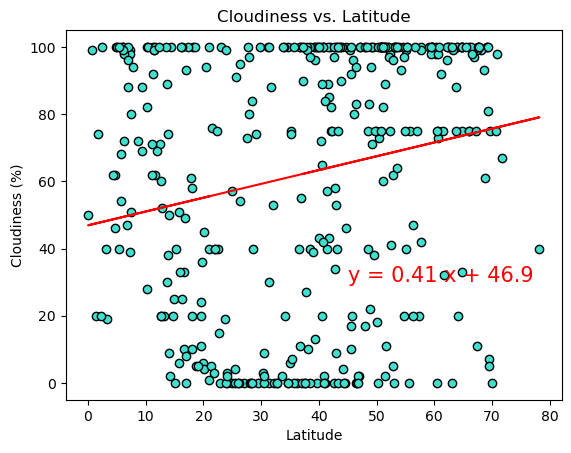

<Figure size 640x480 with 0 Axes>

In [54]:
# Northern Hemisphere
x_values = northern_hemi_df ["Lat"]
y_values = northern_hemi_df ["Cloudiness"]
plot_linear_regression(x_values,y_values, 'Cloudiness', (45,30))

plt.savefig("output_data/Fig9.png")

The r-squared is: 0.20018886914411677


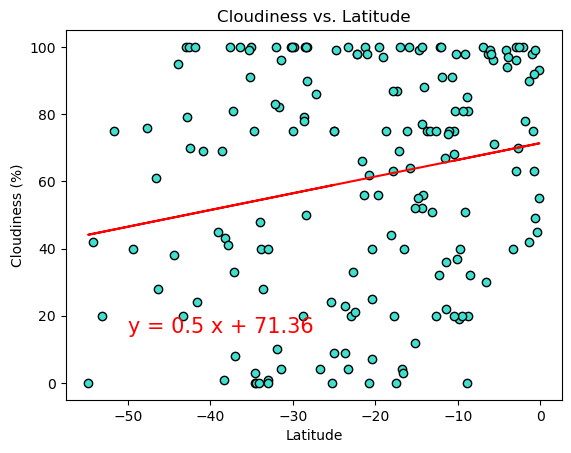

<Figure size 640x480 with 0 Axes>

In [58]:
# Southern Hemisphere
x_values = southern_hemi_df ["Lat"]
y_values = southern_hemi_df ["Cloudiness"]
plot_linear_regression(x_values,y_values, 'Cloudiness', (-50,15))

plt.savefig("output_data/Fig10.png")

**Discussion about the linear relationship:** There appears to be a positive correlation to humidity and lattitude in both the Northern and Southern Hemispheres. The r-squared values are both around 20%, which means that the data doesn't best fit the linear relationship. The values are all scattered throughout the plot and there is no pattern or consistency. The data does not have a specific pattern of behavior to draw any firm conclusions. 

### Wind Speed vs. Latitude Linear Regression Plot

The r-squared is: 0.13120604466892888


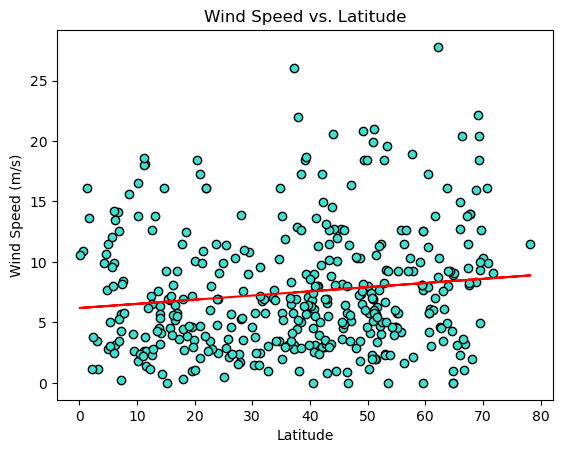

<Figure size 640x480 with 0 Axes>

In [63]:
# Northern Hemisphere
x_values = northern_hemi_df ["Lat"]
y_values = northern_hemi_df ["Wind Speed"]
plot_linear_regression(x_values,y_values, 'Wind Speed', (10,50))

plt.savefig("output_data/Fig11.png")

The r-squared is: -0.2608847612926791


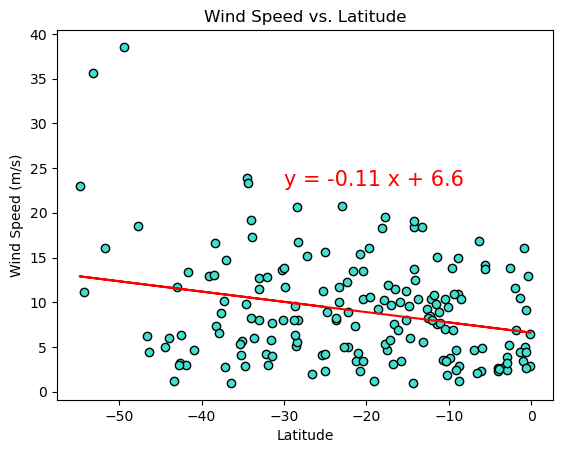

<Figure size 640x480 with 0 Axes>

In [65]:
# Southern Hemisphere
x_values = southern_hemi_df ["Lat"]
y_values = southern_hemi_df ["Wind Speed"]
plot_linear_regression(x_values,y_values, 'Wind Speed', (-30,23))

plt.savefig("output_data/Fig12.png")

**Discussion about the linear relationship:** In the Northern Hemisphere, there is a very slight positive correlation with the wind speed and the latitude. I would not confidently describe these values as having a positive correlation. There's a negative correlation between these two paramenters in the Southern Hemisphere. The wind speed appears to be consisently under 20 m/s no matter at what latitude with few outliers present. There doesn't appear to be any trends that could be predicted based on this data in relation to wind speed and lattitude. I believe that there are more geographical factors that would impact wind speed in addition to lattitude. 